In [63]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima

In [13]:
data = pd.read_csv("AirPassengers.csv",delimiter=",")["#Passengers"]

<Axes: >

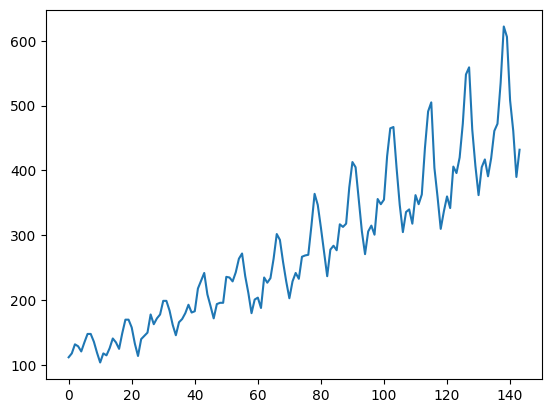

In [15]:
data.plot()

In [19]:
df_test = adfuller(data)

In [22]:
df_test_p_val = df_test[1]#p-value

P-value > 0.05 - H0 hypotesis (data is not stationary) can't be declined

In [29]:
print(df_test_p_val)

0.9918802434376409


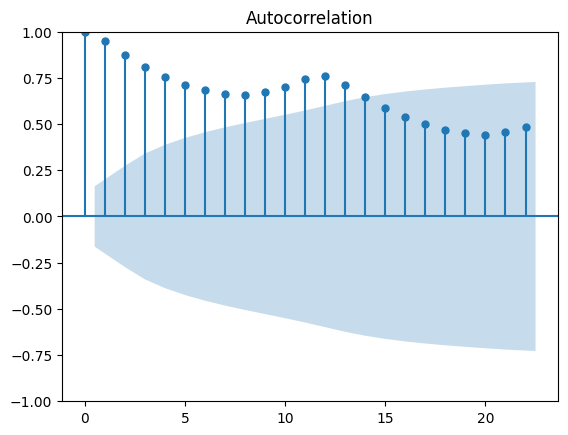

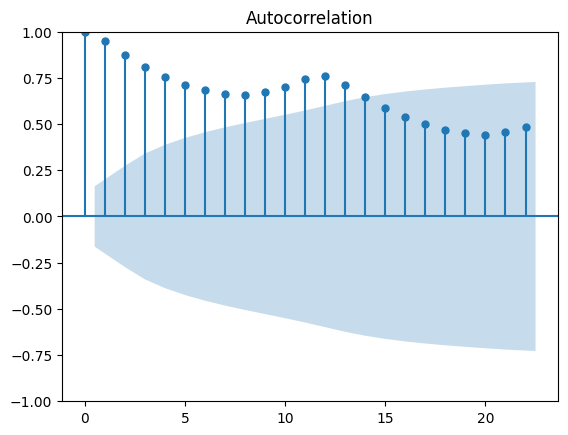

In [30]:
plot_acf(data)

In [31]:
data_diff = data - data.shift(12)

<Axes: >

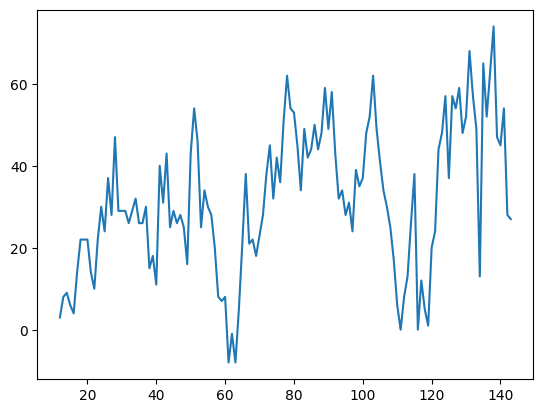

In [34]:
data_diff.plot()

In [37]:
df_test_non_seasonal = adfuller(data_diff.dropna())

In [39]:
p_value_non_seasonal = df_test_non_seasonal[1]

p-value is < 0.05 => H0 (data is not stationary) can be rejected

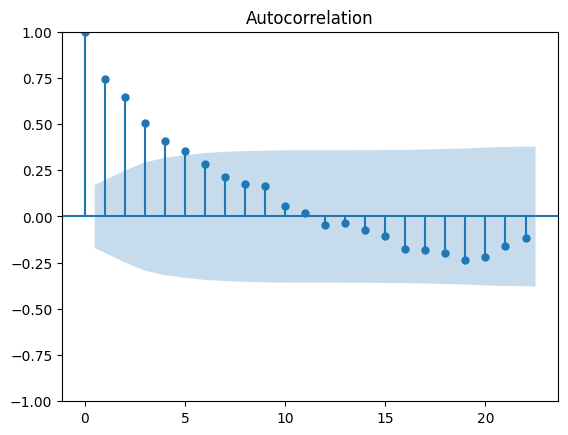

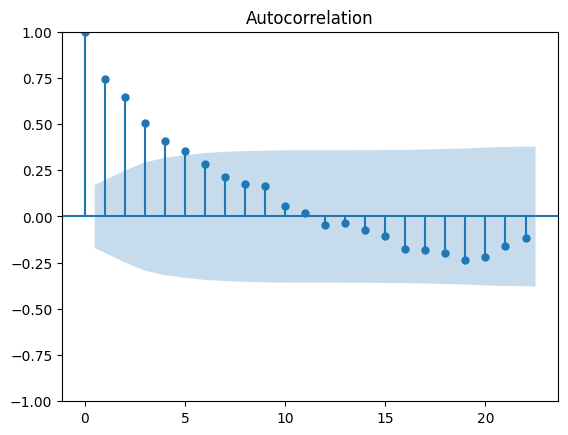

In [41]:
plot_acf(data_diff.dropna())

In [50]:
ar_2_model = sm.tsa.arima.ARIMA(data_diff.dropna(),order=(2,0,0))

C:\Users\arturs.olekss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [52]:
ar_2_results = ar_2_model.fit()

In [53]:
ar_2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  132
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -507.579
Date:                Mon, 31 Jul 2023   AIC                           1023.157
Time:                        19:03:02   BIC                           1034.689
Sample:                             0   HQIC                          1027.843
                                - 132                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.5559      4.808      6.355      0.000      21.132      39.980
ar.L1          0.5968      0.083      7.195      0.000       0.434       0.759
ar.L2          0.2128      0.077      2.771      0.006       0.062       0.363
sigma2       127.1723     14.593      8.714      0.000      98.570     155.775
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.51
Prob(Q):                              0.95   Prob(JB):                         0.04
Heteroskedasticity (H):               2.28   Skew:                             0.13
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

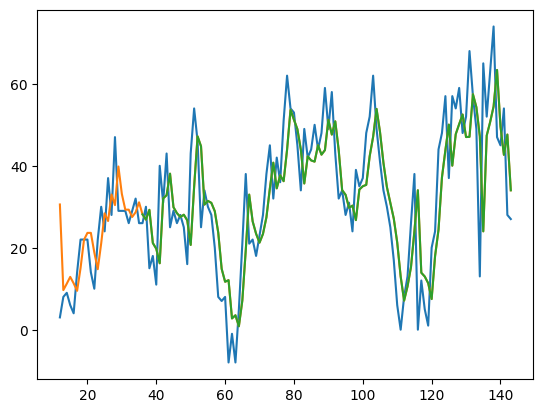

In [85]:
plt.plot(data_diff)
plt.plot(ar_2_results.fittedvalues)
plt.plot(ar_2_results.predict(24))

In [73]:
arima_auto = auto_arima(data_diff.dropna())

In [74]:
auto_arima_results = arima_auto.fit(data_diff,trace=True)

In [75]:
auto_arima_results

ARIMA(order=(2, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

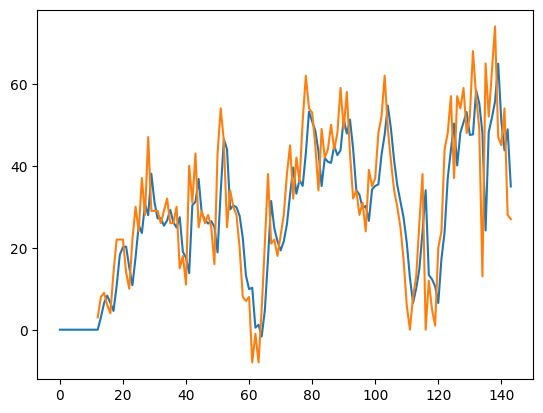

In [77]:
plt.plot(auto_arima_results.fittedvalues())
plt.plot(data_diff)

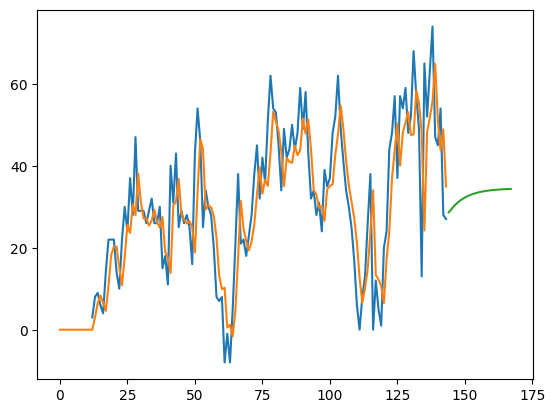

In [83]:
plt.plot(data_diff)
plt.plot(auto_arima_results.fittedvalues())
plt.plot(auto_arima_results.predict(24))